In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("data.txt",sep=",")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [7]:
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
data["year"]=data["Date_of_Journey"].apply(lambda date: date.year)
data["month"]=data["Date_of_Journey"].apply(lambda date: date.month)
data["day"]=data["Date_of_Journey"].apply(lambda date: date.day)
data.drop(["Date_of_Journey"],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [9]:
data["Arrival_Time"]=data["Arrival_Time"].str.split(' ').str[0]
data["Arrival_hour"]=data["Arrival_Time"].str.split(':').str[0].astype(int)
data["Arrival_minute"]=data["Arrival_Time"].str.split(':').str[1].astype(int)
data.drop(["Arrival_Time"],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897,2019,3,24,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662,2019,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2 stops,No info,13882,2019,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218,2019,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302,2019,1,3,21,35


In [10]:
data["Dep_Time"]=data["Dep_Time"].str.split(' ').str[0]
data["Dep_hour"]=data["Dep_Time"].str.split(':').str[0].astype(int)
data["Dep_minute"]=data["Dep_Time"].str.split(':').str[1].astype(int)
data.drop(["Dep_Time"],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,2019,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,2019,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,2019,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,2019,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,2019,1,3,21,35,16,50


In [11]:
data["Total_Stops"].isnull().sum()

1

In [12]:
data[data["Total_Stops"].isnull()==True]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,2019,6,5,9,25,9,45


In [13]:
data["Total_Stops"]=data["Total_Stops"].fillna("1 stop") 

In [14]:
data["Total_Stops"].isnull().sum()

0

In [15]:
data["Total_Stops"]=data["Total_Stops"].replace("non-stop","0 stop")

In [16]:
data["Totalstops"]=data["Total_Stops"].str.split(" ").str[0].astype(int)
data.drop(["Total_Stops"],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Totalstops
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,No info,3897,2019,3,24,1,10,22,20,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,No info,7662,2019,1,5,13,15,5,50,2
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,No info,13882,2019,9,6,4,25,9,25,2
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,No info,6218,2019,12,5,23,30,18,5,1
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,No info,13302,2019,1,3,21,35,16,50,1


In [17]:
data["Route"].isnull().sum()

1

In [18]:
data[data["Route"].isnull()==True]

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Totalstops
9039,Air India,Delhi,Cochin,NaN,23h 40m,No info,7480,2019,6,5,9,25,9,45,1


In [19]:
data["Route"][9039]="DEL?COK"

In [20]:
print(data["Route"].isnull().sum())
data[9039:9040]

0


,Airline,Source,Destination,Route,Duration,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Totalstops
9039,Air India,Delhi,Cochin,DEL?COK,23h 40m,No info,7480,2019,6,5,9,25,9,45,1


In [21]:
data["route1"]=data["Route"].str.split('?').str[0]
data["route2"]=data["Route"].str.split('?').str[1]
data["route3"]=data["Route"].str.split('?').str[2]
data["route4"]=data["Route"].str.split('?').str[3]

In [22]:
data.drop(["Route"],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Totalstops,route1,route2,route3,route4
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897,2019,3,24,1,10,22,20,0,BLR,DEL,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,No info,7662,2019,1,5,13,15,5,50,2,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,19h,No info,13882,2019,9,6,4,25,9,25,2,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218,2019,12,5,23,30,18,5,1,CCU,NAG,BLR,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302,2019,1,3,21,35,16,50,1,BLR,NAG,DEL,NaN


In [23]:
data["route1"].fillna("None",inplace=True)
data["route2"].fillna("None",inplace=True)
data["route3"].fillna("None",inplace=True)
data["route4"].fillna("None",inplace=True)

In [24]:
data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Totalstops,route1,route2,route3,route4
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897,2019,3,24,1,10,22,20,0,BLR,DEL,None,None
1,Air India,Kolkata,Banglore,7h 25m,No info,7662,2019,1,5,13,15,5,50,2,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,19h,No info,13882,2019,9,6,4,25,9,25,2,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218,2019,12,5,23,30,18,5,1,CCU,NAG,BLR,None
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302,2019,1,3,21,35,16,50,1,BLR,NAG,DEL,None


In [25]:
data["Duration_hours"]=data["Duration"].str.split(" ").str[0]
data["Duration_minutes"]=data["Duration"].str.split(" ").str[1]
data["Duration_hours"]=data["Duration_hours"].str.split("h").str[0]
data["Duration_minutes"]=data["Duration_minutes"].str.split("m").str[0]
data["Duration_hours"][6474]=int(0)
data["Duration_minutes"][6474]=int(5)
data["Duration_hours"]=data["Duration_hours"].astype(int)
data["Duration_minutes"]=data["Duration_hours"].astype(int)

In [26]:
data["Duration_hours"].fillna(0,inplace=True)
data["Duration_minutes"].fillna(0,inplace=True)
data.drop(["Duration"],axis=1,inplace=True)

In [27]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Totalstops,route1,route2,route3,route4,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,No info,3897,2019,3,24,1,10,22,20,0,BLR,DEL,None,None,2,2
1,Air India,Kolkata,Banglore,No info,7662,2019,1,5,13,15,5,50,2,CCU,IXR,BBI,BLR,7,7
2,Jet Airways,Delhi,Cochin,No info,13882,2019,9,6,4,25,9,25,2,DEL,LKO,BOM,COK,19,19
3,IndiGo,Kolkata,Banglore,No info,6218,2019,12,5,23,30,18,5,1,CCU,NAG,BLR,None,5,5
4,IndiGo,Banglore,New Delhi,No info,13302,2019,1,3,21,35,16,50,1,BLR,NAG,DEL,None,4,4


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder=LabelEncoder()
data["Airline"]=encoder.fit_transform(data["Airline"])
data["Source"]=encoder.fit_transform(data["Source"])
data["Destination"]=encoder.fit_transform(data["Destination"])
data["Additional_Info"]=encoder.fit_transform(data["Additional_Info"])
data["route1"]=encoder.fit_transform(data["route1"])
data["route2"]=encoder.fit_transform(data["route2"])
data["route3"]=encoder.fit_transform(data["route3"])
data["route4"]=encoder.fit_transform(data["route4"])
data.head()

,Airline,Source,Destination,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Totalstops,route1,route2,route3,route4,Duration_hours,Duration_minutes
0,3,0,5,8,3897,2019,3,24,1,10,22,20,0,0,13,29,13,2,2
1,1,3,0,8,7662,2019,1,5,13,15,5,50,2,2,25,1,3,7,7
2,4,2,1,8,13882,2019,9,6,4,25,9,25,2,4,32,4,5,19,19
3,3,3,0,8,6218,2019,12,5,23,30,18,5,1,2,34,3,13,5,5
4,3,0,5,8,13302,2019,1,3,21,35,16,50,1,0,34,8,13,4,4


In [30]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Airline,10683.0,3.965927,2.352155,0.0,3.0,4.0,4.0,11.0
Source,10683.0,1.952261,1.177221,0.0,2.0,2.0,3.0,4.0
Destination,10683.0,1.436113,1.474782,0.0,0.0,1.0,2.0,5.0
Additional_Info,10683.0,7.393054,1.214211,0.0,8.0,8.0,8.0,9.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
year,10683.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
month,10683.0,5.534775,2.987489,1.0,3.0,5.0,6.0,12.0
day,10683.0,12.682205,8.803701,3.0,5.0,6.0,21.0,27.0
Arrival_hour,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
Arrival_minute,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0


In [31]:
data.corr()

,Airline,Source,Destination,Additional_Info,Price,year,month,day,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Totalstops,route1,route2,route3,route4,Duration_hours,Duration_minutes
Airline,1.000000,-0.013401,0.018479,-0.060802,-0.039520,NaN,-0.007918,0.031218,-0.007491,-0.071089,-0.035194,-0.060044,-0.199411,0.033776,-0.061847,0.060169,0.261808,-0.158285,-0.158285
Source,-0.013401,1.000000,-0.592574,-0.022107,0.015998,NaN,0.063052,0.007560,0.025632,0.021040,0.059044,-0.056991,0.192840,0.315685,0.035834,-0.271172,-0.076015,0.166109,0.166109
Destination,0.018479,-0.592574,1.000000,0.026806,-0.071112,NaN,-0.105039,-0.052076,-0.039710,0.017196,-0.072979,0.127892,-0.295481,-0.395155,0.077710,0.410066,0.132148,-0.258459,-0.258459
Additional_Info,-0.060802,-0.022107,0.026806,1.000000,-0.065478,NaN,-0.009098,-0.019456,0.026173,0.041311,-0.051010,-0.019339,-0.082426,0.019629,0.078014,0.167212,-0.042353,-0.168725,-0.168725
Price,-0.039520,0.015998,-0.071112,-0.065478,1.000000,NaN,0.010700,-0.165412,0.024264,-0.086155,0.006819,-0.024492,0.603883,0.195725,-0.087304,-0.591294,-0.316937,0.508672,0.508672
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.007918,0.063052,-0.105039,-0.009098,0.010700,NaN,1.000000,-0.264899,-0.004338,-0.025786,0.028180,0.002152,0.065498,0.033289,0.005500,-0.069169,-0.039954,0.055568,0.055568
day,0.031218,0.007560,-0.052076,-0.019456,-0.165412,NaN,-0.264899,1.000000,-0.002124,-0.021424,-0.002251,-0.016521,-0.024156,0.103255,-0.019595,0.034309,-0.013921,-0.038081,-0.038081
Arrival_hour,-0.007491,0.025632,-0.039710,0.026173,0.024264,NaN,-0.004338,-0.002124,1.000000,-0.154362,0.005215,0.043054,0.038123,0.007970,-0.012459,-0.081867,0.048553,0.055180,0.055180
Arrival_minute,-0.071089,0.021040,0.017196,0.041311,-0.086155,NaN,-0.025786,-0.021424,-0.154362,1.000000,0.067909,-0.017594,-0.106939,-0.194379,0.045938,0.159981,-0.022570,-0.074439,-0.074439


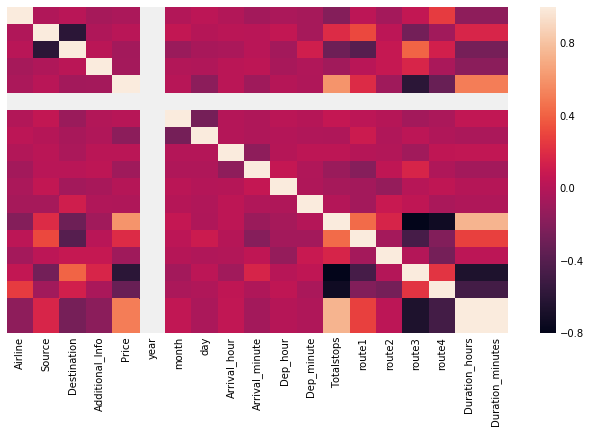

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),yticklabels=False)

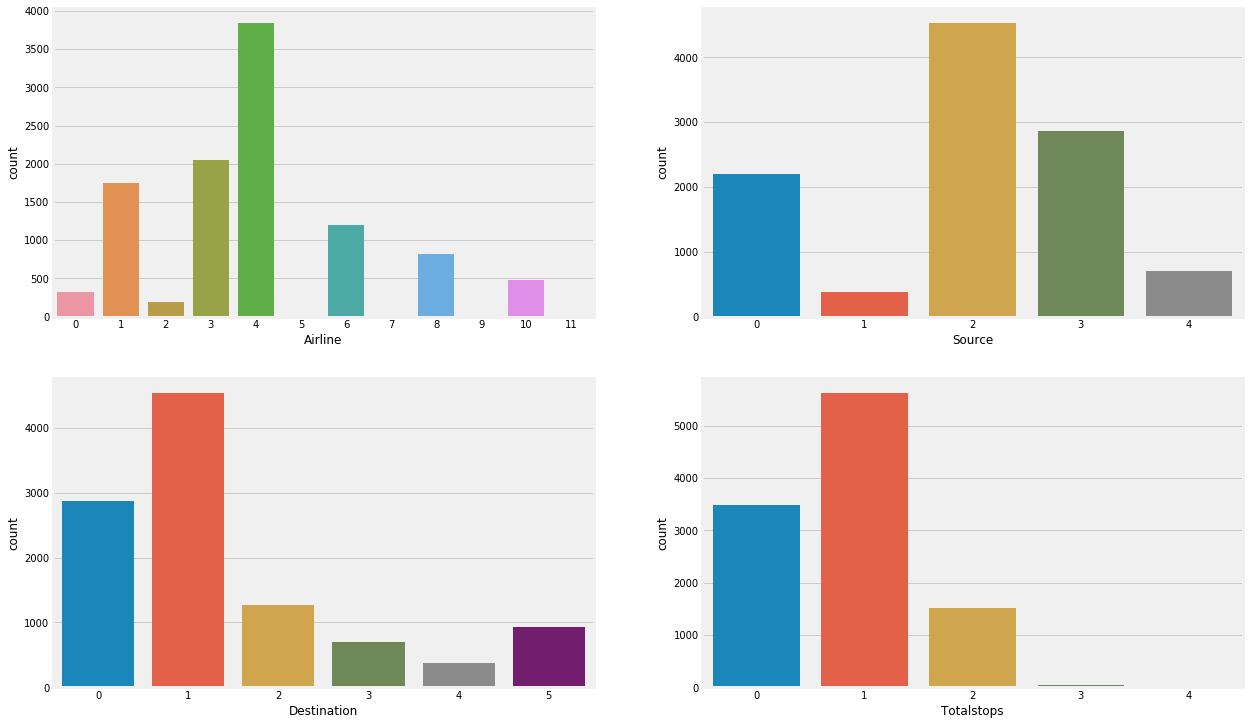

In [33]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.countplot(data["Airline"])
fig.add_subplot(2,2,2)
sns.countplot(data["Source"])
fig.add_subplot(2,2,3)
sns.countplot(data["Destination"])
fig.add_subplot(2,2,4)
sns.countplot(data["Totalstops"])

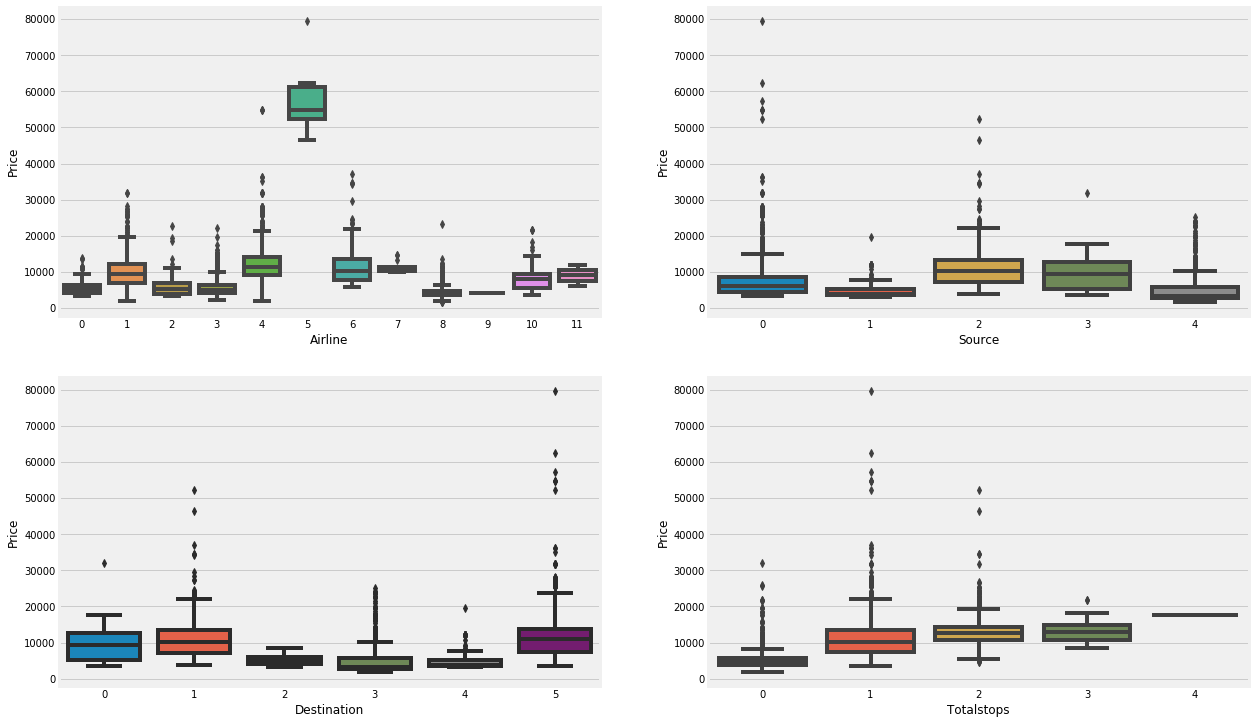

In [34]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.boxplot(x="Airline",y="Price",data=data)
fig.add_subplot(2,2,2)
sns.boxplot(x="Source",y="Price",data=data)
fig.add_subplot(2,2,3)
sns.boxplot(x="Destination",y="Price",data=data)
fig.add_subplot(2,2,4)
sns.boxplot(x="Totalstops",y="Price",data=data)

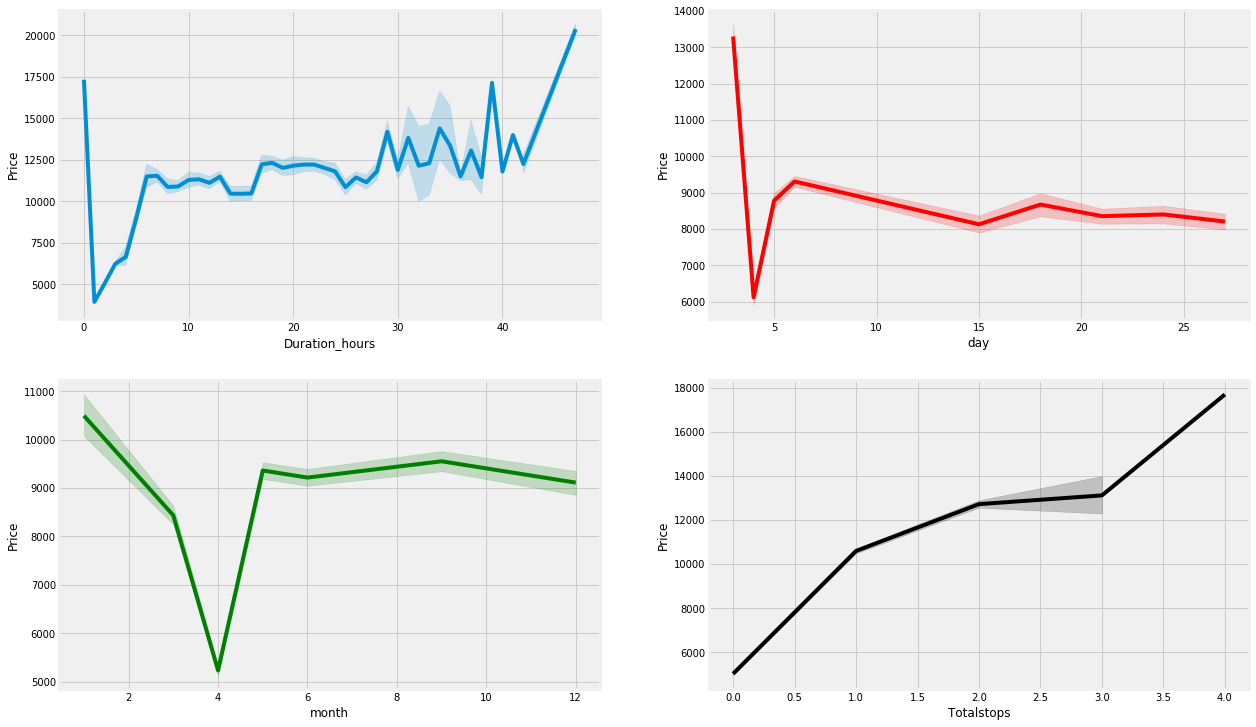

In [35]:
fig=plt.figure(figsize=(19,12.5))
fig.add_subplot(2,2,1)
sns.lineplot(x="Duration_hours",y="Price",data=data)
fig.add_subplot(2,2,2)
sns.lineplot(x="day",y="Price",data=data,c="r")
fig.add_subplot(2,2,3)
sns.lineplot(x="month",y="Price",data=data,c="g")
fig.add_subplot(2,2,4)
sns.lineplot(x="Totalstops",y="Price",data=data,c="black")

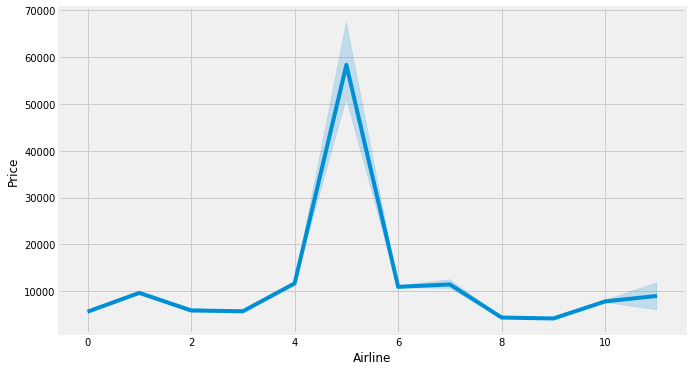

In [36]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Airline",y="Price",data=data)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#data.drop(["Duration_hours","Duration_minutes"],axis=1,inplace=True)

In [38]:
x=data.drop(["Price"],axis=1)
y=data["Price"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [40]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [41]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
def creatingmodel(optimizer="adam",loss="mse"):
    model=Sequential()
    model.add(Dense(150,input_dim=18,activation="relu"))
    model.add(Dense(100,activation="relu"))
    model.add(Dense(85,activation="relu"))
    model.add(Dense(75,activation="relu"))
    model.add(Dense(63,activation="relu"))
    model.add(Dense(56,activation="relu"))
    model.add(Dense(18,activation="relu"))
    model.add(Dense(9,activation="relu"))
    model.add(Dense(1,activation="relu"))
    model.compile(optimizer=optimizer,loss=loss)
    return model
model=creatingmodel()

In [43]:
callbacks=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=400)

In [44]:
model.fit(x=x_train,y=y_train,
         validation_data=(x_test,y_test),
         epochs=2000,batch_size=20,verbose=1,callbacks=[callbacks])

Train on 8012 samples, validate on 2671 samples
Epoch 1/2000
8012/8012 [==============================] - 3s 329us/sample - loss: 24493720.0414 - val_loss: 9932821.2817
Epoch 2/2000
8012/8012 [==============================] - 1s 180us/sample - loss: 9703587.0036 - val_loss: 9893430.7218
Epoch 3/2000
8012/8012 [==============================] - 1s 184us/sample - loss: 9101431.8157 - val_loss: 8682773.5413
Epoch 4/2000
8012/8012 [==============================] - 1s 176us/sample - loss: 8610431.1395 - val_loss: 8276695.1594
Epoch 5/2000
8012/8012 [==============================] - 1s 182us/sample - loss: 7995396.2695 - val_loss: 7742347.1133
Epoch 6/2000
8012/8012 [==============================] - 1s 178us/sample - loss: 7299537.0184 - val_loss: 7029602.7516
Epoch 7/2000
8012/8012 [==============================] - 1s 173us/sample - loss: 6825975.5894 - val_loss: 6884565.6799
Epoch 8/2000
8012/8012 [==============================] - 1s 173us/sample - loss: 6622128.1606 - val_loss: 6659

8012/8012 [==============================] - 1s 176us/sample - loss: 1280537.1871 - val_loss: 3726679.3620
Epoch 136/2000
8012/8012 [==============================] - 1s 174us/sample - loss: 1330787.5520 - val_loss: 3674353.7112
Epoch 137/2000
8012/8012 [==============================] - 1s 172us/sample - loss: 1326614.5963 - val_loss: 3652969.3418
Epoch 138/2000
8012/8012 [==============================] - 1s 177us/sample - loss: 1352080.5152 - val_loss: 4078858.0941
Epoch 139/2000
8012/8012 [==============================] - 1s 177us/sample - loss: 1301560.3230 - val_loss: 3597620.2353
Epoch 140/2000
8012/8012 [==============================] - 1s 175us/sample - loss: 1232768.5959 - val_loss: 3951508.0438
Epoch 141/2000
8012/8012 [==============================] - 1s 176us/sample - loss: 1221774.9470 - val_loss: 3628262.0950
Epoch 142/2000
8012/8012 [==============================] - 1s 177us/sample - loss: 1477308.3964 - val_loss: 4432868.1984
Epoch 143/2000
8012/8012 [=============

8012/8012 [==============================] - 1s 74us/sample - loss: 894730.9160 - val_loss: 3697052.3509
Epoch 271/2000
8012/8012 [==============================] - 1s 75us/sample - loss: 794730.6090 - val_loss: 3801929.8817
Epoch 272/2000
8012/8012 [==============================] - 1s 75us/sample - loss: 816487.3178 - val_loss: 4632673.4270
Epoch 273/2000
8012/8012 [==============================] - 1s 74us/sample - loss: 865771.0669 - val_loss: 3655402.4947
Epoch 274/2000
8012/8012 [==============================] - 1s 74us/sample - loss: 971564.0598 - val_loss: 3728036.3123
Epoch 275/2000
8012/8012 [==============================] - 1s 75us/sample - loss: 757971.0759 - val_loss: 3558493.4995
Epoch 276/2000
8012/8012 [==============================] - 1s 72us/sample - loss: 763097.7391 - val_loss: 3964740.5361
Epoch 277/2000
8012/8012 [==============================] - 1s 72us/sample - loss: 825140.9830 - val_loss: 3860092.4748
Epoch 278/2000
8012/8012 [=============================

8012/8012 [==============================] - 1s 77us/sample - loss: 548010.2433 - val_loss: 3830280.2524
Epoch 407/2000
8012/8012 [==============================] - 1s 76us/sample - loss: 580123.6968 - val_loss: 3702916.4751
Epoch 408/2000
8012/8012 [==============================] - 1s 77us/sample - loss: 738166.8365 - val_loss: 3591541.2733
Epoch 409/2000
8012/8012 [==============================] - 1s 77us/sample - loss: 547724.0247 - val_loss: 3708690.1481
Epoch 410/2000
8012/8012 [==============================] - 1s 77us/sample - loss: 535442.2026 - val_loss: 3803481.3776
Epoch 411/2000
8012/8012 [==============================] - 1s 76us/sample - loss: 567962.6468 - val_loss: 3614173.8476
Epoch 412/2000
8012/8012 [==============================] - 1s 77us/sample - loss: 596564.3312 - val_loss: 3813936.8924
Epoch 413/2000
8012/8012 [==============================] - 1s 77us/sample - loss: 532369.7961 - val_loss: 3788328.2639
Epoch 414/2000
8012/8012 [=============================

8012/8012 [==============================] - 1s 80us/sample - loss: 436716.9149 - val_loss: 3949329.1442
Epoch 543/2000
8012/8012 [==============================] - 1s 78us/sample - loss: 438938.0415 - val_loss: 3714256.9613
Epoch 544/2000
8012/8012 [==============================] - 1s 77us/sample - loss: 486145.3847 - val_loss: 3754321.8426
Epoch 545/2000
8012/8012 [==============================] - 1s 77us/sample - loss: 524678.0068 - val_loss: 3783280.7814
Epoch 546/2000
8012/8012 [==============================] - 1s 78us/sample - loss: 485765.2484 - val_loss: 3779937.1626
Epoch 547/2000
8012/8012 [==============================] - 1s 78us/sample - loss: 379540.9080 - val_loss: 3931550.6944
Epoch 548/2000
8012/8012 [==============================] - 1s 80us/sample - loss: 408833.7371 - val_loss: 3690541.0284
Epoch 549/2000
8012/8012 [==============================] - 1s 99us/sample - loss: 459276.9071 - val_loss: 3696081.0106
Epoch 550/2000
8012/8012 [=============================

In [45]:
loss=pd.DataFrame(model.history.history)
loss.tail()

,loss,val_loss
643,329705.648048,3.724697e+06
644,359004.974729,3.649984e+06
645,351198.518000,3.699153e+06
646,468961.113084,3.755375e+06
647,442038.918729,3.714859e+06


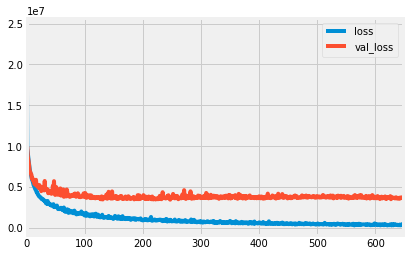

In [46]:
loss.plot()

In [47]:
y_pred=model.predict(x_test)

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score

In [49]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,3.714859e+06,1927.39705,981.689308,0.821647


In [44]:
from tensorflow.keras.models import model_from_json

In [51]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [45]:
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

In [46]:
loaded_model.compile(loss="mse",optimizer="adam")

In [47]:
scores=loaded_model.predict(x_test)

In [50]:
errorloadedwights=pd.DataFrame([[mean_squared_error(y_test,scores),
                     np.sqrt(mean_squared_error(y_test,scores)),
                    mean_absolute_error(y_test,scores),
                    explained_variance_score(y_test,scores)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
errorloadedwights

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,3.714859e+06,1927.39705,981.689308,0.821647


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
RFG=RandomForestRegressor(n_estimators=100,random_state=5)

In [53]:
RFG.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=5, verbose=0,
                      warm_start=False)

In [54]:
y_predict_rfg=RFG.predict(x_test)

In [55]:
error_rfg=pd.DataFrame([[mean_squared_error(y_test,y_predict_rfg),
                     np.sqrt(mean_squared_error(y_test,y_predict_rfg)),
                    mean_absolute_error(y_test,y_predict_rfg),
                    explained_variance_score(y_test,y_predict_rfg)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error_rfg

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,2.748974e+06,1658.002945,648.809724,0.868071


In [58]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid={"max_depth":[10,20,30,None],
            "max_leaf_nodes":[5,10,20,None],
            "n_estimators":[100,200,150],
           "bootstrap":[True,False],
           "min_samples_leaf":[1,2,3]}
gridsearch=GridSearchCV(RandomForestRegressor(),param_grid=param_grid,verbose=3)
gridsearch.fit(x_train,y_train)
print(gridsearch.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, score=0.589, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, score=0.579, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, score=0.568, total=   0.4s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, score=0.589, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, score=0.579, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, score=0.569, total=   0.8s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=150, score=0.591, total=   0.6s
[CV] bootstrap=True, max_depth=10, max_le

[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=200, score=0.674, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=150, score=0.713, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=150, score=0.716, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=150, score=0.675, total=   0.7s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100, score=0.718, total=   0.5s
[CV] bootstrap=True, max_depth=1

[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=150, score=0.729, total=   0.9s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, score=0.888, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, score=0.876, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, score=0.822, total=   1.0s
[CV] bootstrap=True, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200, score=0.885, total=   2.0s
[CV] bootstrap=T

[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100, score=0.567, total=   0.4s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, score=0.591, total=   0.8s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, score=0.583, total=   0.8s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, score=0.568, total=   0.8s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=150, score=0.592, total=   0.6s
[CV] bootstrap=True, max_depth=20, max_le

[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=200, score=0.681, total=   1.0s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150, score=0.716, total=   0.7s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150, score=0.714, total=   0.7s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150, score=0.677, total=   0.7s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100, score=0.776, total=   0.6s
[CV] bootstrap=True, max_depth=2

[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, score=0.833, total=   2.2s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100, score=0.889, total=   1.3s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100, score=0.882, total=   1.3s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100, score=0.834, total=   1.3s
[CV] bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, score=0.889, total=   2.6s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=100, score=0.569, total=   0.4s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, score=0.592, total=   0.8s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, score=0.581, total=   0.8s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, score=0.568, total=   0.8s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=150, score=0.590, total=   0.6s
[CV] bootstrap=True, max_depth=30, max_le

[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=200, score=0.721, total=   1.2s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150, score=0.777, total=   0.9s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150, score=0.773, total=   0.9s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150, score=0.721, total=   0.9s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=100, score=0.766, total=   0.6s
[CV] bootstrap=True, max_depth=3

[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=150, score=0.836, total=   2.0s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, score=0.877, total=   1.2s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, score=0.879, total=   1.2s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, score=0.835, total=   1.2s
[CV] bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=True, max_depth=30, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=200, score=0.881, total=   2.4s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=100, score=0.678, total=   0.5s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200, score=0.714, total=   1.0s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200, score=0.710, total=   1.0s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=200, score=0.676, total=   1.0s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, n_estimators=150, score=0.716, total=   0.8s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=200, score=0.768, total=   1.1s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=200, score=0.723, total=   1.2s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=150, score=0.769, total=   0.9s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=150, score=0.764, total=   0.9s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=150, score=0.725, total=   0.9s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=150, score=0.881, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=150, score=0.877, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=True, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=150, score=0.830, total=   1.8s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, score=0.586, total=   0.6s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=100, score=0.573, total=   0.6s
[CV] bootstr

[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100, score=0.705, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100, score=0.704, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=100, score=0.614, total=   0.7s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=200, score=0.705, total=   1.5s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=200, score=0.704, total=   1.5s
[CV] bootstrap=False, m

[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=200, score=0.766, total=   1.7s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=200, score=0.749, total=   1.7s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=200, score=0.726, total=   1.7s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=150, score=0.766, total=   1.3s
[CV] bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=10, max_leaf_nodes=20, min_samples_leaf=3, n_estimators=150, score=0.749, total=   1.3s
[CV] bootstrap=False, m

[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=200, score=0.557, total=   1.2s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=150, score=0.586, total=   0.9s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=150, score=0.573, total=   0.9s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=150, score=0.557, total=   0.9s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=100, score=0.586, total=   0.6s
[CV] bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=2, n_estimators=150, score=0.616, total=   1.0s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100, score=0.705, total=   0.7s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100, score=0.704, total=   0.7s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=100, score=0.656, total=   0.7s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=200, score=0.705, total=   1.4s
[CV] bootstrap=False, m

[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=100, score=0.745, total=   2.2s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200, score=0.859, total=   4.5s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200, score=0.823, total=   4.6s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=200, score=0.751, total=   4.4s
[CV] bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=False, max_depth=20, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=150, score=0.859, total=   3.4s
[CV] 

[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, score=0.573, total=   1.1s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=200, score=0.557, total=   1.1s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=150, score=0.586, total=   0.9s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=150, score=0.573, total=   0.8s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=5, min_samples_leaf=2, n_estimators=150, score=0.557, total=   0.8s
[CV] bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150, score=0.704, total=   1.1s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=10, min_samples_leaf=3, n_estimators=150, score=0.656, total=   1.1s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100, score=0.763, total=   0.9s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100, score=0.760, total=   0.9s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=100, score=0.673, total=   0.8s
[CV] bootstrap=False, m

[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100, score=0.829, total=   2.0s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=100, score=0.749, total=   2.0s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, score=0.858, total=   4.0s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, score=0.828, total=   4.1s
[CV] bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=30, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=200, score=0.749, total=   4.0s
[CV] 

[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, score=0.586, total=   1.1s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, score=0.573, total=   1.1s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=200, score=0.557, total=   1.1s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=150, score=0.586, total=   0.8s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=5, min_samples_leaf=3, n_estimators=150, score=0.573, total=   0.8s
[CV] bootstrap

[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=200, score=0.673, total=   1.7s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150, score=0.763, total=   1.3s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150, score=0.760, total=   1.3s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, n_estimators=150, score=0.670, total=   1.3s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=20, min_samples_leaf=2, n_estimators=100, score=0.754, total=   0.8s
[CV] 

[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=150, score=0.829, total=   3.0s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=150 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=2, n_estimators=150, score=0.750, total=   3.0s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, score=0.871, total=   1.9s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, score=0.819, total=   1.9s
[CV] bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=100, score=0.800, t

[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed: 18.2min finished


{'bootstrap': True, 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 100}


In [56]:
RFG=RandomForestRegressor(n_estimators=100,random_state=5,
                          max_depth=None,max_leaf_nodes=None,
                          min_samples_leaf=1,bootstrap=True)

In [57]:
RFG.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=5, verbose=0,
                      warm_start=False)

In [58]:
y_predict_rfg=RFG.predict(x_test)

In [59]:
error_rfg=pd.DataFrame([[mean_squared_error(y_test,y_predict_rfg),
                     np.sqrt(mean_squared_error(y_test,y_predict_rfg)),
                    mean_absolute_error(y_test,y_predict_rfg),
                    explained_variance_score(y_test,y_predict_rfg)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error_rfg

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,2.748974e+06,1658.002945,648.809724,0.868071


In [60]:
rfg_train_score=RFG.score(x_train,y_train)
rfg_train_score

0.9820387562040779

In [61]:
rfg_test_score=RFG.score(x_test,y_test)
rfg_test_score

0.8680195072388954